In [31]:
import json
import infosys.utils as utils 
import igraph as ig
import os
import collections
import matplotlib.pyplot as plt

In [14]:
mode='igraph'
ABS_PATH = '..'
DATA_PATH = os.path.join(ABS_PATH, "data")
path = DATA_PATH
follower_path = os.path.join(path, "follower_network.gml")
infosys_path = os.path.join(path, mode, "network.gml")

In [15]:
G = ig.Graph.Read_GML(infosys_path)

In [16]:
fpath = os.path.join(path, mode, "results.json.gz")

In [17]:
verbose = utils.read_json_compressed(fpath)

In [20]:
verbose['all_memes']

[{'id': 1,
  'is_by_bot': 1.0,
  'phi': 1,
  'quality': 0,
  'fitness': 0.01194856873622585,
  'human_shares': 0,
  'bot_shares': 2,
  'spread_via_agents': [104.0, 120.0],
  'qual_th': 0,
  'share_th': 0},
 {'id': 2,
  'is_by_bot': 0.0,
  'phi': 1,
  'quality': 0.3361295623301829,
  'fitness': 0.3361295623301829,
  'human_shares': 1,
  'bot_shares': 0,
  'spread_via_agents': [74.0],
  'qual_th': 524,
  'share_th': 453},
 {'id': 3,
  'is_by_bot': 0.0,
  'phi': 1,
  'quality': 0.1478386080452836,
  'fitness': 0.1478386080452836,
  'human_shares': 1,
  'bot_shares': 0,
  'spread_via_agents': [83.0],
  'qual_th': 404,
  'share_th': 348},
 {'id': 4,
  'is_by_bot': 0.0,
  'phi': 1,
  'quality': 0.0400906605391077,
  'fitness': 0.0400906605391077,
  'human_shares': 1,
  'bot_shares': 0,
  'spread_via_agents': [67.0],
  'qual_th': 303,
  'share_th': 256},
 {'id': 5,
  'is_by_bot': 1.0,
  'phi': 1,
  'quality': 0,
  'fitness': 0.26922702493503037,
  'human_shares': 0,
  'bot_shares': 1,
  'spre

In [24]:
spreading = [node for meme in verbose['all_memes'] for node in meme['spread_via_agents']]

## Deg histogram of the network

(array([75., 21., 24., 16.,  7.,  3.,  0.,  2.,  0.,  2.]),
 array([ 0. ,  3.8,  7.6, 11.4, 15.2, 19. , 22.8, 26.6, 30.4, 34.2, 38. ]),
 <BarContainer object of 10 artists>)

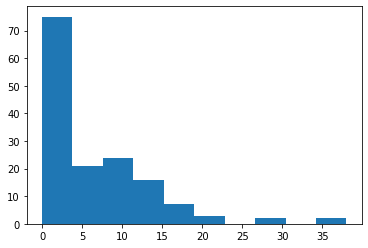

In [34]:
graph = G
mode='in'
vertices = range(len(graph.vs)) #vertices index
degs = graph.degree(vertices, mode=mode, loops=False)
plt.hist(degs)

# Plot number of shares a meme gets vs the indeg of the spreading channel 
Let's say hubs are those with indeg>=15. 

## Bot memes

In [35]:
shares = [meme['human_shares'] + meme['bot_shares'] for meme in verbose['all_memes'] if meme['is_by_bot']==1]

In [40]:
import numpy as np

In [48]:
shares=[]
avg_indegs = []
largest_indegs=[]
for meme in verbose['all_memes']:
    if meme['is_by_bot']==1:
        shares+= [meme['human_shares'] + meme['bot_shares']]
        spread_through= [int(node) for node in meme['spread_via_agents']]
        indegs = graph.degree(vertices, mode=mode, loops=False)
        avg_indegs += [np.mean(indegs)]
        largest_indegs += [max(indegs)]

Text(0, 0.5, 'shares')

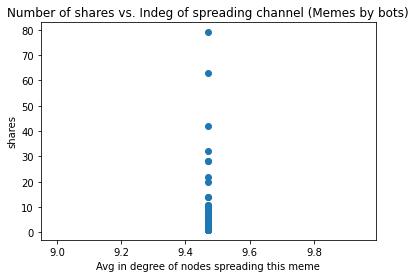

In [50]:
plt.scatter(avg_indegs, shares)
plt.title('Number of shares vs. Indeg of spreading channel (Memes by bots)')
plt.xlabel('Avg in degree of nodes spreading this meme')
plt.ylabel('shares')

Text(0, 0.5, 'shares')

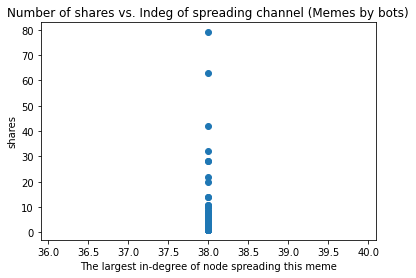

In [51]:
plt.scatter(largest_indegs, shares)
plt.title('Number of shares vs. Indeg of spreading channel (Memes by bots)')
plt.xlabel('The largest in-degree of node spreading this meme')
plt.ylabel('shares')

--> Seems like every meme goes through a hub

In [55]:
common_node = verbose['all_memes'][0]['spread_via_agents']
print(common_node)
for idx, meme in enumerate(verbose['all_memes'][1:]):
    common_node = set(meme['spread_via_agents']) & set(common_node)
print(common_node)

[104.0, 120.0]
set()


--> They don't go through the same nodes, but nodes with same indeg

Jaccard similarity of the indeg of meme spreading channels 

In [56]:
meme_spreading_indegs = []
for meme in verbose['all_memes']:
    if meme['is_by_bot']==1:
        spread_through= [int(node) for node in meme['spread_via_agents']]
        indegs = graph.degree(vertices, mode=mode, loops=False)
        meme_spreading_indegs += [indegs]

In [59]:
from scipy.spatial import distance

In [60]:
# Get pair-wise jaccard distance:
jc = []
for idx,meme in enumerate(meme_spreading_indegs):
    jaccards = [distance.jaccard(meme, othermeme) for othermeme in meme_spreading_indegs[idx:]]
    jc +=jaccards

AttributeError: module 'matplotlib.pyplot' has no attribute 'ylalbel'

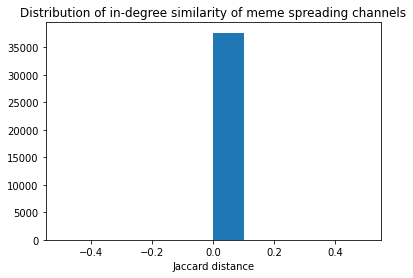

In [66]:
plt.hist(jc)
plt.title('Distribution of in-degree similarity of meme spreading channels')
plt.xlabel('Jaccard distance')
plt.ylalbel('Freq')
# plt.yscale('log')

## All memes

In [44]:
shares=[]
avg_indegs = []
largest_indegs=[]
for meme in verbose['all_memes']:
    shares+= [meme['human_shares'] + meme['bot_shares']]
    spread_through= [int(node) for node in meme['spread_via_agents']]
    indegs = graph.degree(vertices, mode=mode, loops=False)
    avg_indegs += [np.mean(indegs)]
    largest_indegs += [max(indegs)]

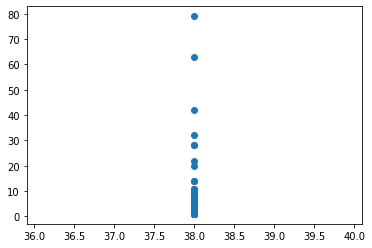

In [45]:
plt.scatter(largest_indegs, shares)

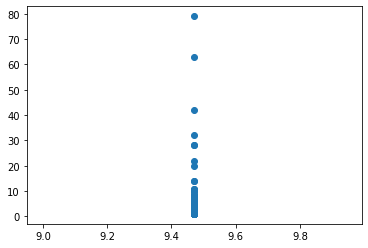

In [46]:
plt.scatter(avg_indegs, shares)

In [32]:
def plot_degree_dist(graph, mode='in'):
    vertices = range(len(graph.vs)) #vertices index
    degs = graph.degree(vertices, mode=mode, loops=False)
    degs = dict(collections.Counter(degs))
    k_per_deg = dict(sorted(degs.items()))
    p_k = {deg: num/len(vertices) for deg,num in k_per_deg.items()}
    plt.scatter(p_k.keys(),p_k.values())
    
    plt.yscale('log')
    plt.xscale('log')
    plt.ylabel('p_k')
    plt.xlabel('k')
    plt.title('Degree distribution (%s degree)' %mode)
    plt.show()

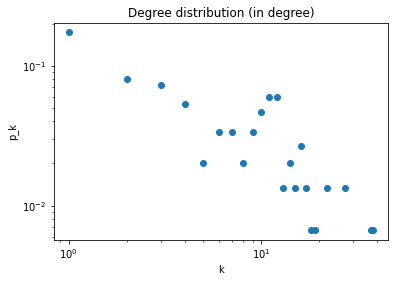

In [33]:
plot_degree_dist(G, mode='in')

In [22]:
nodes = [v for v in G.vs]
nodes

[igraph.Vertex(<igraph.Graph object at 0x1541298b0>, 0, {'id': 0.0, 'bot': 0.0, 'uid': '0'}),
 igraph.Vertex(<igraph.Graph object at 0x1541298b0>, 1, {'id': 1.0, 'bot': 0.0, 'uid': '1'}),
 igraph.Vertex(<igraph.Graph object at 0x1541298b0>, 2, {'id': 2.0, 'bot': 0.0, 'uid': '2'}),
 igraph.Vertex(<igraph.Graph object at 0x1541298b0>, 3, {'id': 3.0, 'bot': 0.0, 'uid': '3'}),
 igraph.Vertex(<igraph.Graph object at 0x1541298b0>, 4, {'id': 4.0, 'bot': 0.0, 'uid': '4'}),
 igraph.Vertex(<igraph.Graph object at 0x1541298b0>, 5, {'id': 5.0, 'bot': 0.0, 'uid': '5'}),
 igraph.Vertex(<igraph.Graph object at 0x1541298b0>, 6, {'id': 6.0, 'bot': 0.0, 'uid': '6'}),
 igraph.Vertex(<igraph.Graph object at 0x1541298b0>, 7, {'id': 7.0, 'bot': 0.0, 'uid': '7'}),
 igraph.Vertex(<igraph.Graph object at 0x1541298b0>, 8, {'id': 8.0, 'bot': 0.0, 'uid': '8'}),
 igraph.Vertex(<igraph.Graph object at 0x1541298b0>, 9, {'id': 9.0, 'bot': 0.0, 'uid': '9'}),
 igraph.Vertex(<igraph.Graph object at 0x1541298b0>, 10, {'i